In [99]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
with open('./data/train.json') as json_data:
    d = json.load(json_data)
    #print(d)

In [101]:
type(d)

dict

In [102]:
print d.keys()
print len(d['price'])

[u'listing_id', u'interest_level', u'display_address', u'description', u'created', u'price', u'bedrooms', u'longitude', u'photos', u'manager_id', u'latitude', u'bathrooms', u'building_id', u'street_address', u'features']
49352


In [103]:
nn = len(d['price'])
index=d['listing_id']
apDF = pd.DataFrame(d, index=index)

In [104]:
apDF.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
110554,2.0,3,f7fc4fd7b6b80615ebfce3e212e17cce,2016-04-03 02:22:45,This one WON'T LAST!! Here is a stunning 3 Bed...,Hausman Street,"[Pre-War, Dishwasher, Hardwood Floors]",medium,40.7245,6818139,-73.9389,198d2e96429920ff71cd06ddff323713,[https://photos.renthop.com/2/6818139_a50e80ff...,2995,23 Hausman Street
11542,1.0,0,45c480f3a0771a4e6ddf7a81790a0b07,2016-06-01 02:46:47,Exposed brick wall w/gas electric & heat inclu...,E 78 Street,"[Loft, Laundry in Unit, Hardwood Floors, Dogs ...",medium,40.7706,7088908,-73.9501,136b844f49c4eae017d6cabe8ca03b9d,[https://photos.renthop.com/2/7088908_f931ca0d...,1950,503 E 78 Street
11543,1.0,0,b0d419ddd5ff150f96b328c61ee6e7e2,2016-06-07 17:49:07,Fully furnished studio with kitchenette and fu...,W 83rd St,"[Furnished, Short Term Allowed]",high,40.7855,7122047,-73.9752,0a4de95e82c122b78494dcea6cb9f44d,[https://photos.renthop.com/2/7122047_de461dbe...,1850,155 W 83rd St
11540,1.0,3,c3d5bcc96eb5d960b9a3feb67e71115b,2016-06-16 05:00:55,3 bedrooms <br />2 big queen sized bds...,40th St,[],low,40.6444,7169671,-73.9936,324631e1aacaa41bc4475f879756bbb6,[https://photos.renthop.com/2/7169671_c5963a80...,2400,973 40th St
11541,1.0,3,3989b2e8d5eb6cd4ccfc8fa4257b277b,2016-06-16 03:44:57,"Comfortable spacious renovated apartment, with...",W 144th Beautiful Spacious Renovated Secure L...,"[Cats Allowed, Dogs Allowed, No Fee, Reduced F...",medium,40.8260,7168565,-73.9519,2a4e0d2668fde3afa267d312b3a2a9d8,[https://photos.renthop.com/2/7168565_617723df...,2500,612 W 144th


In [105]:
apDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 110554 to 38346
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [106]:
apDF['bedrooms'].describe()

count    49352.000000
mean         1.541640
std          1.115018
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bedrooms, dtype: float64

In [9]:
apDF['bathrooms'].describe()

count    49352.00000
mean         1.21218
std          0.50142
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         10.00000
Name: bathrooms, dtype: float64

In [10]:
len(apDF['street_address'].unique())

15358

In [11]:
len(apDF['building_id'].unique())

7585

In [12]:
len(apDF['longitude'].unique())

1677

In [13]:
dfSimple = apDF[['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'interest_level']]

In [14]:
dfSimple.head()

,bathrooms,bedrooms,latitude,longitude,price,interest_level
110554,2.0,3,40.7245,-73.9389,2995,medium
11542,1.0,0,40.7706,-73.9501,1950,medium
11543,1.0,0,40.7855,-73.9752,1850,high
11540,1.0,3,40.6444,-73.9936,2400,low
11541,1.0,3,40.8260,-73.9519,2500,medium


In [15]:
interests={'low':1, 'medium':2, 'high':3}

In [16]:
levels = dfSimple['interest_level']
levels = levels.apply(lambda x: interests[x])
dfSimple['level'] = levels
dfSimple.head()

C:\Users\battlann\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,bathrooms,bedrooms,latitude,longitude,price,interest_level,level
110554,2.0,3,40.7245,-73.9389,2995,medium,2
11542,1.0,0,40.7706,-73.9501,1950,medium,2
11543,1.0,0,40.7855,-73.9752,1850,high,3
11540,1.0,3,40.6444,-73.9936,2400,low,1
11541,1.0,3,40.8260,-73.9519,2500,medium,2


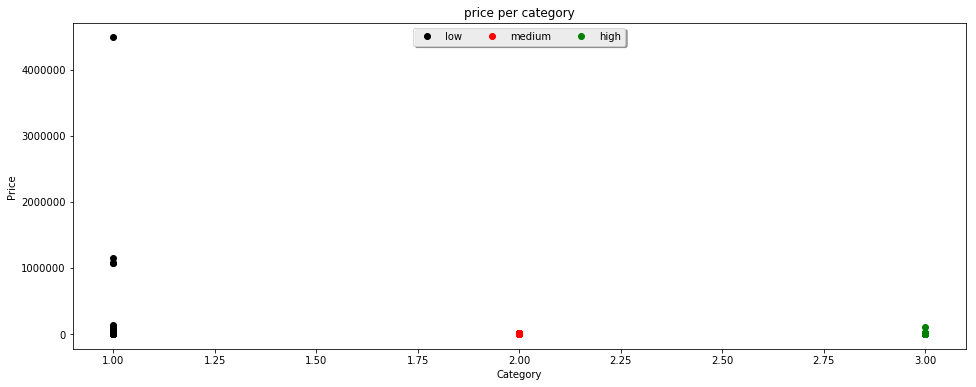

In [17]:
#group by number of bathrooms per category
bthDF = dfSimple.groupby(['level', 'bathrooms']).size()
plt.figure(figsize = (16, 6))

#plt.subplot(1,2,1)
plt.plot(dfSimple[dfSimple['level']==1]['level'], dfSimple[dfSimple['level']==1]['price'],'ko')
plt.plot(dfSimple[dfSimple['level']==2]['level'], dfSimple[dfSimple['level']==2]['price'],'ro')
plt.plot(dfSimple[dfSimple['level']==3]['level'], dfSimple[dfSimple['level']==3]['price'],'go')
#plt.subplot(1,2,2)

plt.title('price per category')
plt.legend(['low', 'medium', 'high'], ncol=4, loc='upper center', 
           fancybox=True, shadow=True)
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

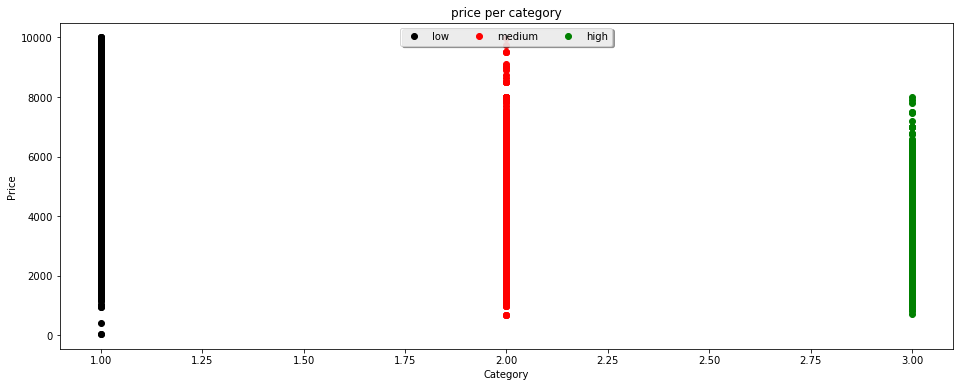

In [18]:
#price per category, lower, than 10000
dfCheap = dfSimple[dfSimple['price']<10000]
bthDF = dfCheap.groupby(['level', 'bathrooms']).size()
plt.figure(figsize = (16, 6))

#plt.subplot(1,2,1)
plt.plot(dfCheap[dfCheap['level']==1]['level'], dfCheap[dfCheap['level']==1]['price'],'ko')
plt.plot(dfCheap[dfCheap['level']==2]['level'], dfCheap[dfCheap['level']==2]['price'],'ro')
plt.plot(dfCheap[dfCheap['level']==3]['level'], dfCheap[dfCheap['level']==3]['price'],'go')
#plt.subplot(1,2,2)

plt.title('price per category')
plt.legend(['low', 'medium', 'high'], ncol=4, loc='upper center', 
           fancybox=True, shadow=True)
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

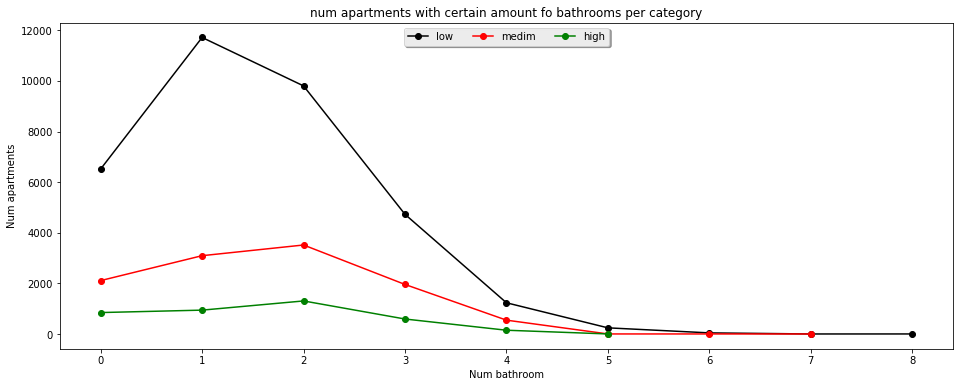

In [19]:
#group by number of bedrooms per category
bthDF = dfSimple.groupby(['level', 'bedrooms']).size()
plt.figure(figsize = (16, 6))

#plt.subplot(1,2,1)
plt.plot(bthDF.loc(axis=0)[1,:][1].index, bthDF.loc(axis=0)[1,:][1].values, 'ko-')
#plt.subplot(1,2,2)
plt.plot(bthDF.loc(axis=0)[2,:][2].index, bthDF.loc(axis=0)[2,:][2].values, 'ro-')
#plt.subplot(1,2,1)
plt.plot(bthDF.loc(axis=0)[3,:][3].index, bthDF.loc(axis=0)[3,:][3].values, 'go-')
plt.title('num apartments with certain amount fo bathrooms per category')
plt.legend(['low', 'medim','high'], ncol=4, loc='upper center', 
           fancybox=True, shadow=True)
plt.xlabel('Num bathroom')
plt.ylabel('Num apartments')
plt.show()


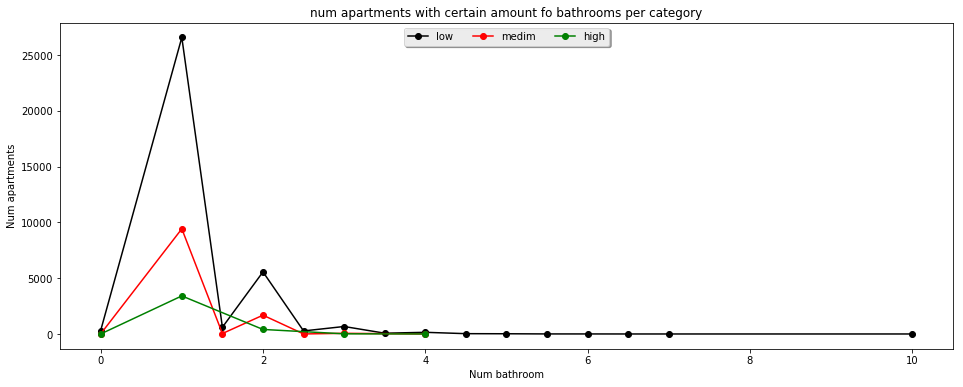

In [20]:
#group by number of bathrooms per category
bthDF = dfSimple.groupby(['level', 'bathrooms']).size()
plt.figure(figsize = (16, 6))
plt.plot(bthDF.loc(axis=0)[1,:][1].index, bthDF.loc(axis=0)[1,:][1].values, 'ko-')
#plt.subplot(1,2,2)
plt.plot(bthDF.loc(axis=0)[2,:][2].index, bthDF.loc(axis=0)[2,:][2].values, 'ro-')
#plt.subplot(1,2,1)
plt.plot(bthDF.loc(axis=0)[3,:][3].index, bthDF.loc(axis=0)[3,:][3].values, 'go-')
plt.title('num apartments with certain amount fo bathrooms per category')
plt.legend(['low', 'medim','high'], ncol=4, loc='upper center', 
           fancybox=True, shadow=True)
plt.xlabel('Num bathroom')
plt.ylabel('Num apartments')
plt.show()


In [21]:
#print bthDF.loc(axis=0)[1,:][1].values
print bthDF.loc(axis=0)[2,:][2].values
#print bthDF.loc(axis=0)[3,:]

[   6 9428   40 1687    3   60    5]


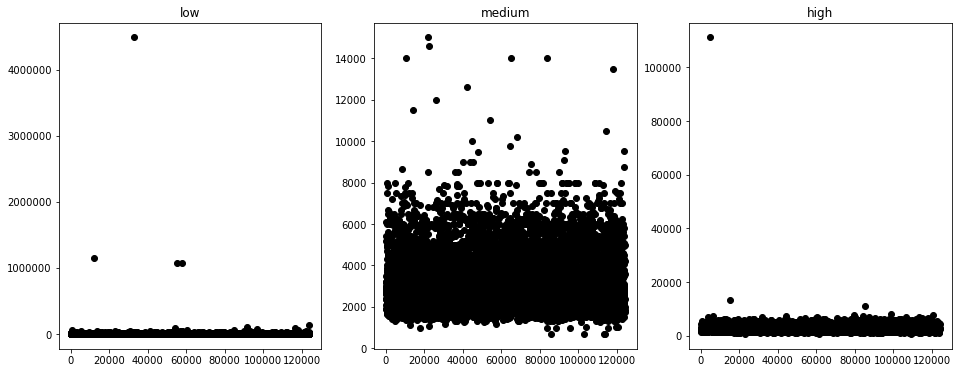

In [36]:
#plt.figure(figsize = (16, 6))
#dfSimple[dfSimple['level']==1]['price'].values
#print type(dfSimple[dfSimple['level']==1]['price'].values)
plt.figure(figsize = (16, 6))
plt.subplot(1,3,2)
plt.title('medium')
xx = dfSimple[dfSimple['level']==2]
plt.plot(xx.index, xx.price,'ko')

plt.subplot(1,3,1)
plt.title('low')
xx = dfSimple[dfSimple['level']==1]
plt.plot(xx.index, xx.price,'ko')

plt.subplot(1,3,3)
plt.title('high')
xx = dfSimple[dfSimple['level']==3]
plt.plot(xx.index, xx.price,'ko')


([array([  6.00000000e+00,   2.31300000e+03,   1.16890000e+04,
           1.00470000e+04,   4.38800000e+03,   2.47600000e+03,
           1.26600000e+03,   6.64000000e+02,   3.27000000e+02,
           1.45000000e+02]),
  array([   11.,  1694.,  4740.,  2729.,  1156.,   558.,   235.,    76.,
            12.,     6.]),
  array([    7.,  1341.,  1452.,   615.,   256.,   116.,    42.,     7.,
             0.,     0.])],
 array([   43. ,  1038.6,  2034.2,  3029.8,  4025.4,  5021. ,  6016.6,
         7012.2,  8007.8,  9003.4,  9999. ]),
 <a list of 3 Lists of Patches objects>)

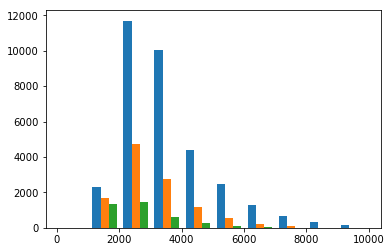

In [37]:
xx = dfCheap[dfCheap['level']==2]['price'].values
plt.hist([dfCheap[dfCheap['level']==1]['price'].values,dfCheap[dfCheap['level']==2]['price'].values,dfCheap[dfCheap['level']==3]['price'].values])

In [77]:
#extract text features
#features
#features = apDF['features'].apply(lambda x: str(x).split(','))
features = apDF['features'].values
#flatten = lambda l: [sublist for sublist in l]


In [94]:
#flist=[]
#for feature in features:
#   flist=flist+feature 
#flist

[u'Pre-War',
 u'Dishwasher',
 u'Hardwood Floors',
 u'Loft',
 u'Laundry in Unit',
 u'Hardwood Floors',
 u'Dogs Allowed',
 u'Cats Allowed',
 u'Furnished',
 u'Short Term Allowed',
 u'Cats Allowed',
 u'Dogs Allowed',
 u'No Fee',
 u'Reduced Fee',
 u'Elevator',
 u'Laundry In Building',
 u'Subway',
 u'High Speed Internet',
 u'Hardwood',
 u'High Ceilings',
 u'Renovated',
 u'Marble Bath',
 u'Granite Kitchen',
 u'Light',
 u'Dogs Allowed',
 u'Cats Allowed',
 u'Roof Deck',
 u'Doorman',
 u'Elevator',
 u'Fitness Center',
 u'Pre-War',
 u'Laundry in Building',
 u'High Speed Internet',
 u'Dishwasher',
 u'Hardwood Floors',
 u'No Fee',
 u'Laundry in Building',
 u'No Fee',
 u'No Fee',
 u'Exclusive',
 u'Laundry In Building',
 u'Pre-War',
 u'Dishwasher',
 u'Hardwood Floors',
 u'Laundry in Building',
 u'Dishwasher',
 u'Hardwood Floors',
 u'No Fee',
 u'Outdoor Space',
 u'Elevator',
 u'Washer/Dryer',
 u'Doorman',
 u'Elevator',
 u'Dogs Allowed',
 u'Cats Allowed',
 u'Dining Room',
 u'Balcony',
 u'Doorman',
 u'El

In [98]:
features=set(flist)
features

{u'Updated Kitchen and Bathroom',
 u'Gym Fitness Lounge Swimming Pool Sun Decks Exercise Studios Indoor Half-Basketball Court',
 u'NYU',
 u'private-outdoor-space',
 u'Great Natural Light',
 u'Super On Site',
 u'Vaulted Ceilings',
 u'custom lighting',
 u'Diswasher',
 u'Brand Newm Outdoor Deck',
 u'STAINLESS STEEL',
 u'central air',
 u'Central Park 1/2 block away!',
 u'** HOLY DEAL BATMAN! * ENTIRE FLOOR! * MASSIVE 4BR MANSION * GOURMET KITCHEN * PETS OK **',
 u'** PRISTINE PREWAR GEM! * MASSIVE 3BR SUPER SHARE * GUT RENOVATED * CHEF;S KITCHEN * ELEV BLDG * PETS OK **',
 u'2nd Ave',
 u'Sun Drenched',
 u'Pets: Case by case',
 u'Wonderful 2 bed in WV   Grab it or Grieve it..xoxo',
 u'must see',
 u'** PRISTINE PARK AVE S LOFT! * MASSIVE 3BR MANSION * WALLS OF WINDOWS * CHEF INSPIRED KITCHEN * ELEV BLDG **',
 u'Sun deck',
 u'Doorman',
 u'laundry in building',
 u'amazing detail',
 u'New Renovation',
 u'Pets Allowed Case by Case',
 u'King-Sized Bedroom',
 u'EXPOSED BRICK',
 u'on-sites super',


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
train_data = dfSimple.iloc[:-1000, :]
test_data = dfSimple.iloc[-1000:, :]


In [66]:
train_labels = train_data['level'].values
train_data = train_data.drop(['interest_level'], axis = 1)
train_data = train_data.drop(['level'], axis = 1)

In [67]:
test_labels = test_data['level'].values
test_data = test_data.drop(['interest_level'], axis = 1)
test_data = test_data.drop(['level'], axis = 1)

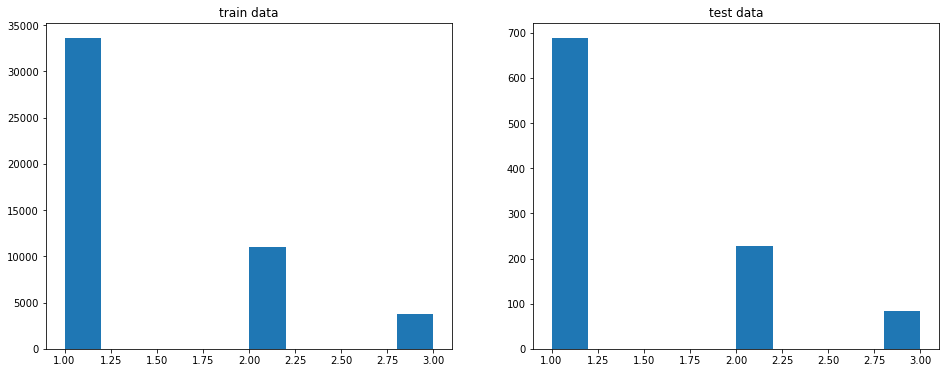

In [130]:
#check label distrib in train and test
plt.figure(figsize = (16, 6))

plt.subplot(1,2,1)
plt.hist(train_labels)
plt.title('train data')

plt.subplot(1,2,2)
plt.hist(test_labels)
plt.title('test data')

In [122]:
rf = RandomForestClassifier(n_estimators=100, random_state = 0)
rf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [123]:
print metrics.mean_absolute_error(test_labels, rf.predict(test_data))
print metrics.accuracy_score(test_labels, rf.predict(test_data))

0.332
0.707


In [78]:
preds = rf.predict(test_data)

In [79]:
print preds

[1 3 2 1 1 1 3 3 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 2 1 3 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1
 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 3 1 1 2 1 1 2 1 1
 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1
 1 1 2 1 1 1 1 1 1 2 1 3 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 2
 1 1 2 1 1 3 2 3 3 1 1 2 3 2 1 1 2 1 1 1 1 1 1 1 1 3 1 2 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 1 3 1 2 2 2 1 2 1 1 1 1 1 1 1 1 2 2
 1 1 2 2 2 1 1 3 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 3 1 1 2
 1 1 1 1 3 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 3 1 2 3 1 1
 2 1 1 1 1 1 1 2 2 1 1 3 1 1 1 3 1 1 2 3 3 1 1 1 1 1 2 3 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 3 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 1 1 1 2 1 2 1 1 

In [80]:
print test_labels

[1 3 1 1 2 1 2 3 2 3 1 2 3 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2
 1 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 2 1 2 2 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 3 1 2 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 3 1
 1 1 2 2 2 1 1 1 1 1 1 1 3 2 1 1 1 1 1 3 1 2 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1
 1 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 3 3 1 1 1 2 1 2 1 1 1 1 3 2 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1 3 1 2 1 1 1 1 1 1 1 1 3 2 1 2
 1 1 1 3 1 3 1 2 3 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 3 3 2 2 3 1 1 2 1 1 1 1
 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 3 1 2 1 1 2 2 3 1 1 2 1 1 1 1 1 1
 2 2 3 2 2 2 1 1 1 3 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 2 1 2 1 2 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 3 1 1 2 2 2 2 2 1
 3 1 1 1 2 1 1 1 2 1 1 2 1 1 1 3 2 1 3 2 2 1 1 1 1 1 2 3 1 2 1 1 1 1 1 1 1
 1 2 2 1 3 1 1 2 2 1 1 1 1 2 2 3 1 2 1 1 3 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1
 2 1 1 1 1 3 1 1 1 2 2 1 

In [92]:
from sklearn import metrics, cross_validation, linear_model, grid_search

C:\Users\battlann\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [113]:
metrics.mean_absolute_error(preds, test_labels)

0.33200000000000002

In [94]:
#SGD classifier attempt
classifier = linear_model.SGDClassifier(random_state = 0)
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 0)

In [95]:
parameters_grid = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'penalty' : ['l1', 'l2'],
    'n_iter' : range(5,10),
    'alpha' : np.linspace(0.0001, 0.001, num = 5),
}

In [97]:
grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv)

In [98]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 3min 35s


GridSearchCV(cv=StratifiedShuffleSplit(labels=[2 2 ..., 1 1], n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['hinge', 'log', 'squared_hinge', 'squared_loss'], 'alpha': array([ 0.0001 ,  0.00032,  0.00055,  0.00078,  0.001  ]), 'n_iter': [5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [99]:
grid_cv.best_estimator_

SGDClassifier(alpha=0.00032499999999999999, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)

In [100]:
print grid_cv.best_score_
print grid_cv.best_params_

0.632344121601
{'penalty': 'l2', 'alpha': 0.00032499999999999999, 'n_iter': 5, 'loss': 'squared_hinge'}


In [101]:
grid_cv.grid_scores_[:10]

[mean: 0.59800, std: 0.18530, params: {'penalty': 'l1', 'alpha': 0.0001, 'n_iter': 5, 'loss': 'hinge'},
 mean: 0.62861, std: 0.14392, params: {'penalty': 'l2', 'alpha': 0.0001, 'n_iter': 5, 'loss': 'hinge'},
 mean: 0.54922, std: 0.19493, params: {'penalty': 'l1', 'alpha': 0.0001, 'n_iter': 6, 'loss': 'hinge'},
 mean: 0.53183, std: 0.20101, params: {'penalty': 'l2', 'alpha': 0.0001, 'n_iter': 6, 'loss': 'hinge'},
 mean: 0.53636, std: 0.23813, params: {'penalty': 'l1', 'alpha': 0.0001, 'n_iter': 7, 'loss': 'hinge'},
 mean: 0.53622, std: 0.23810, params: {'penalty': 'l2', 'alpha': 0.0001, 'n_iter': 7, 'loss': 'hinge'},
 mean: 0.50519, std: 0.20005, params: {'penalty': 'l1', 'alpha': 0.0001, 'n_iter': 8, 'loss': 'hinge'},
 mean: 0.48571, std: 0.20308, params: {'penalty': 'l2', 'alpha': 0.0001, 'n_iter': 8, 'loss': 'hinge'},
 mean: 0.51484, std: 0.18749, params: {'penalty': 'l1', 'alpha': 0.0001, 'n_iter': 9, 'loss': 'hinge'},
 mean: 0.49737, std: 0.20722, params: {'penalty': 'l2', 'alpha':

In [103]:
res2 = grid_cv.best_estimator_.predict(test_data)

In [104]:
res2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [106]:
metrics.mean_absolute_error(test_labels, res2)

0.76900000000000002

In [124]:
#scale features
from sklearn.preprocessing import StandardScaler
#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [125]:
#try to linear classify scaled predictors
regressor = linear_model.SGDClassifier(random_state = 0)
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))
print regressor.predict(scaled_test_data)[:10]

[1 1 1 1 1 1 1 1 1 1]
